# Introduction to Monte Carlo methods

##  An Ising Model of a Ferromagnet

### Setup Environment

In [22]:
import time
import numpy as np
import matplotlib.pyplot as plt

### Construct Class about <u>*Ising model*</u>

In [23]:
class Ising_model:

    kb = 1  #1.38064852e-23

    def __init__(self, L, T):
        self.L = L
        self.T = T
        spin_conf = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                spin = np.random.randint(-1, 2)
                while spin == 0:
                    spin = np.random.randint(-1, 2)
                spin_conf[i][j] = spin
        self.s = spin_conf

    def visual(self, verbose=True):
        L = self.L
        demo = np.zeros(np.shape(self.s), dtype=str)
        num_up, num_down = 0, 0
        for i in range(L):
            for j in range(L):
                if self.s[i][j] == 1.0:
                    demo[i][j] = '↑'
                    num_up += 1
                elif self.s[i][j] == -1.0:
                    demo[i][j] = '↓'
                    num_down += 1
        print(demo)
        if verbose == True:
            print('Spin_up=%i ;Spin_down=%i' % (num_up, num_down))

    def energy(self):
        L = self.L
        E = 0
        J = 1
        for i in range(L):
            for j in range(L):
                E += self.s[i, j] * (self.s[
                    (i + 1) % L, j] + self.s[i, (j + 1) % L])
        energy = -J * E
        return energy

    def magnet(self):
        L = self.L
        M = 0.0
        for i in range(L):
            for j in range(L):
                M += self.s[i, j]
        return M

    def dE(self, i, j):
        L = self.L
        NB = self.s[(i + 1) % L, j] + self.s[i, (j + 1) % L] + self.s[
            (i - 1) % L, j] + self.s[i, (j - 1) % L]
        dE = 2 * self.s[i, j] * NB
        return dE

    def mc_method_sq(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for i in range(L):
            for j in range(L):
                if self.dE(i, j) < 0:
                    self.s[i][j] *= -1
                    accept += 1
                elif self.dE(i, j) > 0:
                    prob = np.exp(-beta * self.dE(i, j))
                    if np.random.random() < prob:
                        self.s[i][j] *= -1
                        accept += 1
                if verbose1 == True:
                    print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                    self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s

    def mc_method_rnd(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for n in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if self.dE(i, j) < 0:
                self.s[i][j] *= -1
                accept += 1
            elif self.dE(i, j) > 0:
                prob = np.exp(-beta * self.dE(i, j))
                if np.random.random() < prob:
                    self.s[i][j] *= -1
                    accept += 1
            if verbose1 == True:
                print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s

### Relation between model size (L) and magnetization (m)

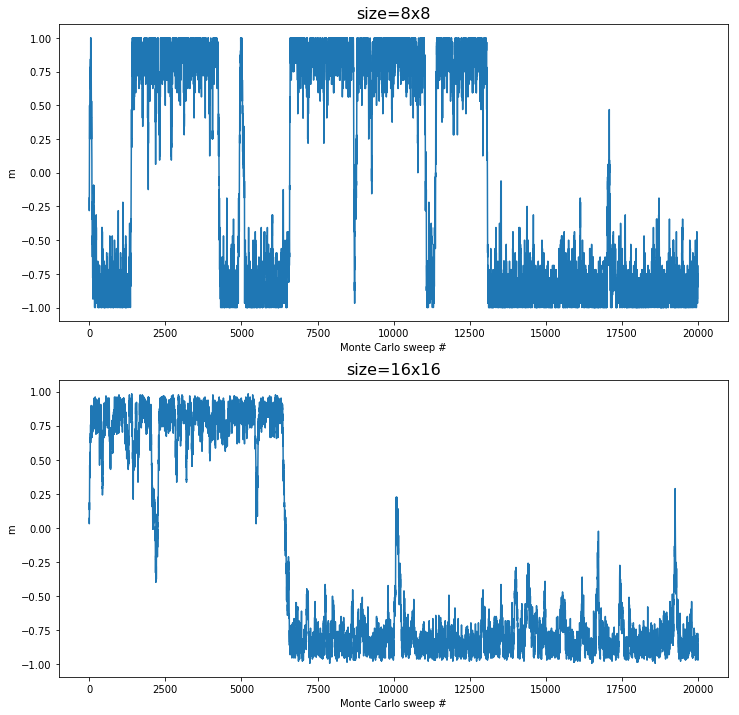

In [24]:
L_list = [8, 16]; T = 2.2; rnd = 20000

fig, axes = plt.subplots(len(L_list), 1, figsize=(12,12))
for i in range(len(L_list)):
    sample = Ising_model(L_list[i], T)
    m = []
    for run in range(rnd):
        sample.mc_method_sq()
        m.append(sample.magnet()/L_list[i]**2)
    x = np.linspace(0, rnd-1, rnd)
    axes[i].plot(x, m)
    axes[i].set_ylabel('m')
    axes[i].set_xlabel('Monte Carlo sweep #')
    axes[i].set_title('size=%ix%i' % (L_list[i], L_list[i]), fontsize=16)
plt.show()

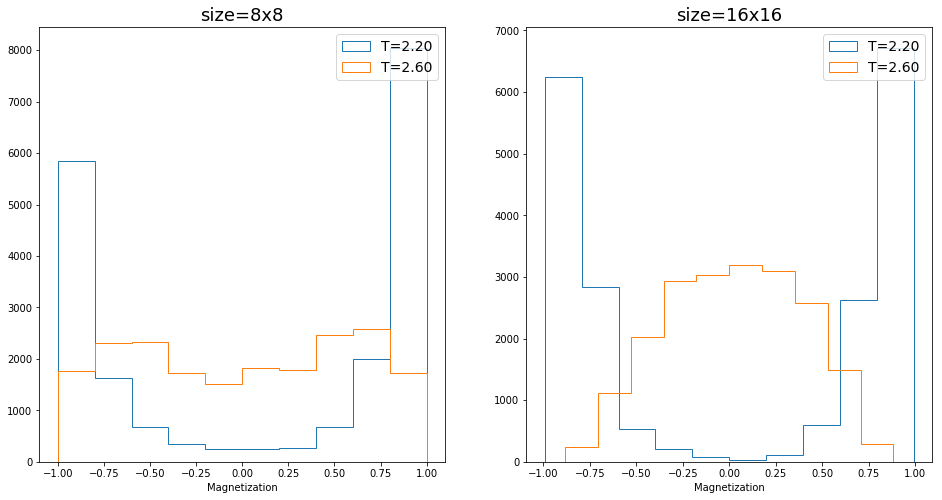

In [25]:
L_list = [8, 16]; T_list = [2.2, 2.6]; rnd = 20000

fig, axes = plt.subplots(1, len(L_list), figsize=(16,8))
for i in range(len(L_list)):
    for j in range(len(T_list)):
        sample = Ising_model(L_list[i], T_list[j])
        m = []
        for run in range(rnd):
            sample.mc_method_sq()
            m.append(sample.magnet()/L_list[i]**2)
        axes[i].hist(m, histtype=u'step', label='T=%.2f' % T_list[j])
        axes[i].set_title('size=%ix%i' % (L_list[i], L_list[i]), fontsize=18)
        axes[i].set_xlabel('Magnetization')
        axes[i].legend(loc='best', prop={'size': 14})
plt.show()